# Análise de Risco de Fraude em Cartão de Crédito


## Importando Pacotes e Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pylab
import matplotlib.pyplot as plt
import datetime as dt


## ETL - Extração , Transformação e Carga de Dados

In [5]:
df = pd.read_csv('creditcard.csv' )
print("Tamanho do dataset: ",df.shape)

Tamanho do dataset:  (284807, 31)


## Engenharia de Atributos

In [7]:
#Criando a variavel HORA

df['Hour'] = (df['Time'] /3600).round()
print(df.Hour.describe())

count    284807.000000
mean         26.335690
std          13.197541
min           0.000000
25%          15.000000
50%          24.000000
75%          39.000000
max          48.000000
Name: Hour, dtype: float64


In [8]:
df['Hour'] = df['Hour'].astype('int')

In [9]:
#Agrupando as horas
df['Hour_groupy'] = df['Hour'].replace([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,44,45,46,47,48], 
                                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
df.Hour_groupy.value_counts()

21    17482
22    17310
11    16799
15    16798
19    16779
17    16641
12    16502
10    16408
16    16150
18    16112
20    15999
14    15851
13    15019
9     13368
23    12893
0      9467
8      8584
1      5721
7      5530
3      4194
6      3465
2      3117
4      2521
5      2097
Name: Hour_groupy, dtype: int64

In [10]:
df.drop(columns=['Time', 'Hour'], inplace=True)
df.shape

(284807, 31)

## Análise Exploratória

In [ ]:
# Analise exploratorios dos dados com amostra de 10% da base original
df2 = df.sample(frac=0.05)
profile = ProfileReport(df2, title="Análise Exploratória", explorative=True)
#profile.to_widgets()
profile.to_notebook_iframe()

In [ ]:

profile.to_file("Analise_Exploratoria_Fraude_Cartao_Credito.html")

(284807, 31)

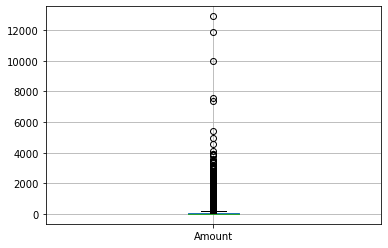

In [11]:
df.sample(frac=0.1).boxplot('Amount')
df.shape

In [12]:
df.query('Amount < 100', inplace=True)

(227422, 31)

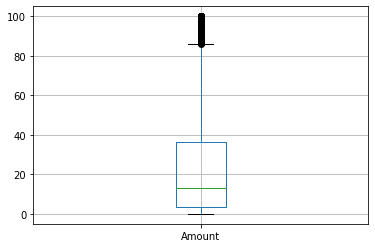

In [14]:
df.sample(frac=0.1).boxplot('Amount')
df.shape

In [15]:
df2 = df.copy()

## Pré - Processamento dos dados

Class 0: 227060
Class 1: 362
Proportion: 627.24 : 1


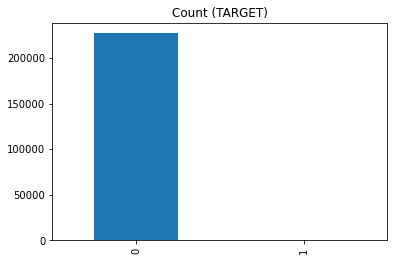

In [16]:
target_count = df2['Class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (TARGET)',color = ['#1F77B4', '#FF7F0E']);

Random under-sampling:
0    362
1    362
Name: Class, dtype: int64


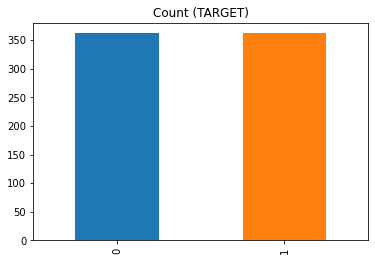

In [17]:
# Undersamplig
count_class_0, count_class_1 = df2['Class'].value_counts()
# Divide by class
df_class_0 = df2[df2['Class'] == 0]
df_class_1 = df2[df2['Class'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df2 = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df2['Class'].value_counts())
df2['Class'].value_counts().plot(kind='bar', title='Count (TARGET)',color = ['#1F77B4', '#FF7F0E']);

In [18]:
df2.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hour_groupy'],
      dtype='object')

In [19]:
features = df2[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour_groupy']] 
target = df2[['Class']]

In [20]:
features.shape, target.shape, df2.shape

((724, 30), (724, 1), (724, 31))

## Modelagem Preditiva

CART: 0.922562 (0.062862)
RandF: 0.943202 (0.065059)
SGD: 0.923941 (0.068458)
GBoost: 0.946010 (0.061250)
Neural: 0.930837 (0.067074)
[11:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

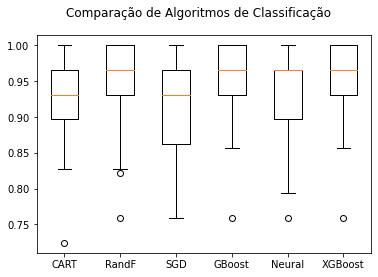

In [21]:
# Avaliação do modelo usando o XGBoost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


# Divide os dados em treino e teste
X = features
Y = target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5 )

# Definindo os valores para o número de folds
num_folds = 25
seed = 7

# Preparando a lista de modelos
Model_cpc = []
#Model_cpc.append(('LR', LogisticRegression()))
#Model_cpc.append(('LDA', LinearDiscriminantAnalysis()))
#Model_cpc.append(('NB', GaussianNB()))
#Model_cpc.append(('KNN', KNeighborsClassifier()))
Model_cpc.append(('CART', DecisionTreeClassifier()))
Model_cpc.append(('RandF', RandomForestClassifier()))
Model_cpc.append(('SGD', SGDClassifier()))
Model_cpc.append(('GBoost', GradientBoostingClassifier()))
#Model_cpc.append(('SVM', SVC(max_iter=500, kernel="poly")))
Model_cpc.append(('Neural', MLPClassifier( max_iter=1000)))
Model_cpc.append(('XGBoost', XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in Model_cpc:
    kfold = KFold(n_splits = num_folds) #, random_state = seed
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Modelagem Preditiva com Xgboost Classifier - Sklearn

In [22]:
# Criando o modelo
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separando as features e target
X = features
Y = target

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

# Criando o modelo
#Model = RandomForestClassifier(n_estimators=100)
#Model = GradientBoostingClassifier(n_estimators=150,  learning_rate=0.1)
#Model = MLPClassifier(hidden_layer_sizes=(50,50,50), alpha=0.01 )
Model = XGBClassifier(nthread = 48, objective = 'binary:logistic',  max_depth = 6, n_estimators=100) 

# Definindo os valores para o número de folds
num_folds = 15
seed = 7
    
# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)    

# Treinando o modelo
Model.fit(X_train, Y_train)

# Previsão do modelo
Predict = Model.predict(X_test)

# Acurácia final e ROC
resultadoAC = cross_val_score(Model, X, Y, cv = kfold, scoring = 'accuracy')
#resultadoROC = cross_val_score(Model, X, Y, cv = kfold, scoring = 'roc_auc')

print("A Acurácia foi de: %.3f%%" % (resultadoAC.mean() * 100.0))
#print("ROC foi de: %.3f" % (resultadoROC.mean() * 100))

report = classification_report(Y_test, Predict)

# Imprimindo o relatório
print(report)

[11:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [23]:
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, classification_report
#!pip install plotly
import plotly.figure_factory as ff

def metricas(y_true, y_pred):
    ac = accuracy_score(y_true, y_pred)
    # ll = log_loss(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ps = precision_score(y_true, y_pred)
    rc = recall_score(y_true, y_pred)
    score = ['Score',round(ac,4),round(ps,4),round(rc,4),round(f1,4)]#,round(ll,4)]

    colunas = ['Métricas', 'Acurácia', 'Precissão', 'Recall', 'F1']#, 'Loss(log)']
    fig = ff.create_table([colunas,  score], height_constant=20)
    fig.show()
metricas(Y_test,Predict)

In [24]:
# Seleção dos melhores atributos como resultado para a modelagem CPC

Model.feature_importances_
feature_importances_cpc = pd.DataFrame(Model.feature_importances_,
                                   index = features.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances_cpc

,importance
V14,0.443303
V4,0.064348
V21,0.050850
V6,0.043931
V1,0.041018
V10,0.037728
V23,0.035401
V18,0.031896
V8,0.029338
V26,0.024162


## Salvando Modelo para Deploy

In [25]:
# Salvando o modelo Propensao a pagar
import pickle

arquivo = 'modelo_v1.sav'
pickle.dump(Model, open(arquivo, 'wb'))
print("Modelo salvo!")

# Salvar as features do modelo
with open('NameFeature_v1','wb') as arquivo:
   pickle.dump(features.columns, arquivo)

print('Nomes Salvo')

Modelo salvo!
Nomes Salvo
